# Q5. Multiple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [5]:
df = pd.read_excel("~chetandeshpande/downloads/MLR_data.xlsx")

In [6]:
df.head()

,X1,X2,Y
0,15.31,57.3,74.8
1,15.20,63.8,74.0
2,16.25,65.4,72.9
3,14.33,57.0,70.0
4,14.57,63.8,74.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      20 non-null     float64
 1   X2      20 non-null     float64
 2   Y       20 non-null     float64
dtypes: float64(3)
memory usage: 608.0 bytes


In [8]:
X = df[['X1','X2']]
y = df['Y']

In [11]:
X = sm.add_constant(X)

In [12]:
model = sm.OLS(y, X).fit()

In [13]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     46.99
Date:                Wed, 07 May 2025   Prob (F-statistic):           1.19e-07
Time:                        20:54:59   Log-Likelihood:                -50.526
No. Observations:                  20   AIC:                             107.1
Df Residuals:                      17   BIC:                             110.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.1094      7.253      4.565      0.0

In [14]:
# R-Squared = 0.847

In [19]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X) 
rmse = np.sqrt(mean_squared_error(y, y_pred))  
print("RMSE:", rmse)

RMSE: 3.026422801154147


In [20]:
# RMSE = 3.0264

In [21]:
# The F-statistic and test statistical significance at α = 0.05

In [22]:
f_stat = model.fvalue
f_pval = model.f_pvalue

# Print the results
print("F-statistic:", f_stat)
print("p-value for F-statistic:", f_pval)

# Test significance at α = 0.05
alpha = 0.05
if f_pval < alpha:
    print("Reject H0: Model is statistically significant at α = 0.05")
else:
    print("Fail to reject H0: Model is not statistically significant")

F-statistic: 46.98986914191224
p-value for F-statistic: 1.1864362651573306e-07
Reject H0: Model is statistically significant at α = 0.05


In [23]:
# p-value=0.0000001186≪0.05, model is statistically significant at α = 0.05

# Q7. Discriminant Analysis

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
data = pd.read_csv("~chetandeshpande/downloads/Discriminant_Analysis_Data_Q7.csv")

In [27]:
data.head()

,Group,GRE,GMAT
0,1,2.96,596
1,1,3.14,473
2,1,3.22,482
3,1,3.29,527
4,1,3.69,505


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   85 non-null     int64  
 1   GRE     85 non-null     float64
 2   GMAT    85 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.1 KB


In [33]:
data.nunique()

Group     3
GRE      67
GMAT     72
dtype: int64

In [59]:
# i) Data Splitting

In [39]:
X = data[['GRE', 'GMAT']]  
y = data['Group'] 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 68
Testing set size: 17


In [42]:
data.shape

(85, 3)

In [60]:
# (ii) Linear Discriminant Analysis (LDA)

In [44]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [45]:
y_pred_lda = lda.predict(X_test)

In [61]:
# (iii) Confusion Matrix and determine the Accuracy

In [46]:
print("LDA Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lda))

LDA Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 5]]


In [47]:
print("\nLDA Classification Report:")
print(classification_report(y_test, y_pred_lda))


LDA Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [49]:
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))

LDA Accuracy: 1.0


In [62]:
# (iv) Quadratic Discriminant Analysis (QDA)

In [52]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [53]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [54]:
y_pred_qda = qda.predict(X_test)

In [55]:
cm_qda = confusion_matrix(y_test, y_pred_qda)
print("QDA Confusion Matrix:\n", cm_qda)

QDA Confusion Matrix:
 [[6 0 0]
 [0 6 0]
 [0 0 5]]


In [56]:
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print("\nQDA Accuracy:", accuracy_qda)


QDA Accuracy: 1.0


In [58]:
report_qda = classification_report(y_test, y_pred_qda, target_names=["Admit (1)", "Not Admit (2)", "Borderline (3)"])
print("\nQDA Classification Report:\n", report_qda)


QDA Classification Report:
                 precision    recall  f1-score   support

     Admit (1)       1.00      1.00      1.00         6
 Not Admit (2)       1.00      1.00      1.00         6
Borderline (3)       1.00      1.00      1.00         5

      accuracy                           1.00        17
     macro avg       1.00      1.00      1.00        17
  weighted avg       1.00      1.00      1.00        17



In [1]:
# Daily Interview Practice

In [103]:
# 2nd Sept, 2025

In [4]:
# Array Basics (Python List)
# 👉 Create a list of numbers from 1 to 10. Print only the even numbers using a loop.

In [5]:
a = range(10)
for i in a:
    if i%2 == 0:
        print(i)

0
2
4
6
8


In [6]:
# NumPy Array Creation
# 👉 Create a NumPy array with values from 0 to 20 in steps of 2.

In [11]:
x = np.arange(0,21,2)
print(x, end=" ")

[ 0  2  4  6  8 10 12 14 16 18 20] 

In [12]:
# Array Statistics
# 👉 Generate a NumPy array of 100 random numbers between 0 and 1. Print its mean, median, and standard deviation.

In [19]:
y = np.random.rand(100)
print("The mean of y is", np.mean(y))
print("The median of y is", np.median(y))
print("The SD of y is", np.std(y))

The mean of y is 0.49921353379448674
The median of y is 0.49948760577656587
The SD of y is 0.28528815270327573


In [20]:
# Loop with NumPy
# 👉 Write a loop to calculate the sum of squares of numbers in a NumPy array [1, 2, 3, 4, 5].
# Expected Output: 55.

In [31]:
x = [1,2,3,4,5]
total = 0
for i in x:
    total = total+(i**2)
    print(total)

1
5
14
30
55


In [32]:
# 2D Array Manipulation
# 👉 Create a 3x3 NumPy array with numbers 1–9. Extract the first row and the second column.

In [34]:
x = np.arange(1,10).reshape(3,3)
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [43]:
x[0,:]

array([1, 2, 3])

In [44]:
x[:,1]

array([2, 5, 8])

In [47]:
x[2,:]

array([7, 8, 9])

In [49]:
x[:,0]

array([1, 4, 7])

In [53]:
x[1,2]

6

In [59]:
x[0:2,0:2]

array([[1, 2],
       [4, 5]])

In [61]:
x[1:3,1:3]

array([[5, 6],
       [8, 9]])

In [62]:
#Boolean Masking
# 👉 From the array [5, 12, 7, 20, 25, 2], select only values greater than 10.

In [79]:
x = [5, 12, 7, 20, 25, 2]
result = []

for i in x:
    if i > 10:
        result.append(i)

print(result)

[12, 20, 25]


In [81]:
# Matplotlib Line Plot
# 👉 Plot a line graph for y = x^2 where x = [0,1,2,3,4,5].

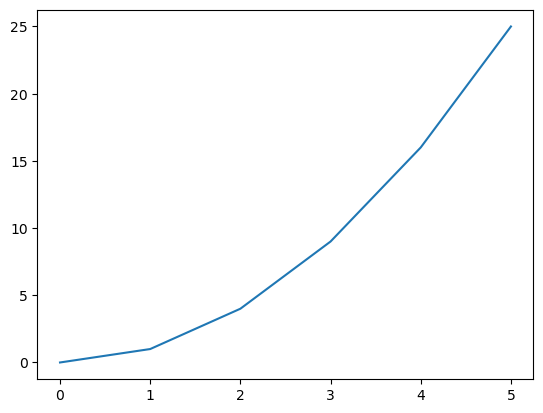

In [86]:
x = np.array([0,1,2,3,4,5])
y = x**2

plt.plot(x,y)
plt.show()

In [87]:
# Matplotlib Scatter Plot
# 👉 Create a scatter plot of 50 random points (x, y) between 0 and 10.

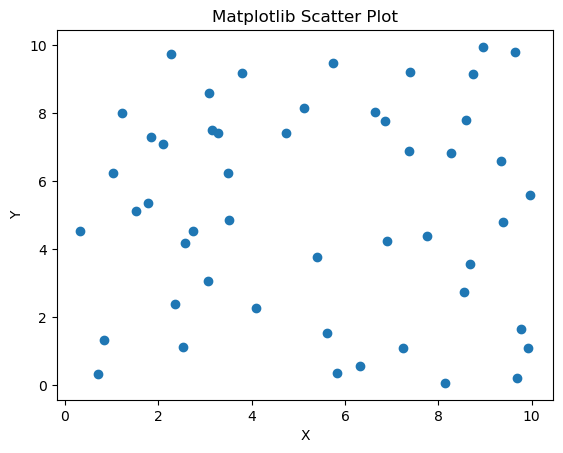

In [92]:
x = np.random.uniform(0,10,50)
y = np.random.uniform(0,10,50)

plt.scatter(x,y)
plt.title("Matplotlib Scatter Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [93]:
# Matplotlib Bar Chart
# 👉 Create a bar chart showing sales for 5 products: [20, 35, 30, 35, 27]

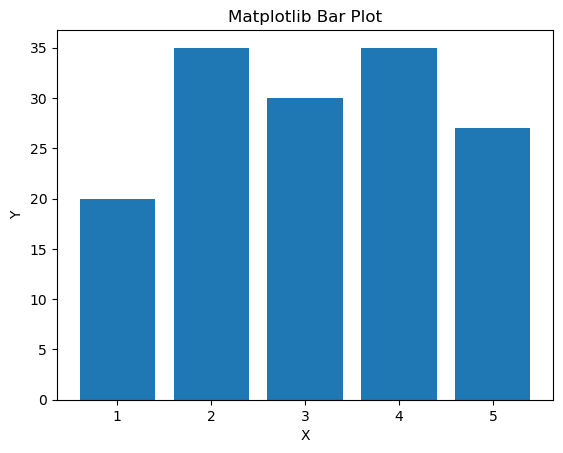

In [96]:
y = [20,35,30,35,27]
x = [1,2,3,4,5]

plt.bar(x,y)
plt.title("Matplotlib Bar Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [97]:
# Combine NumPy + Matplotlib
# 👉 Generate 100 random values from a normal distribution. Plot their histogram with 10 bins.

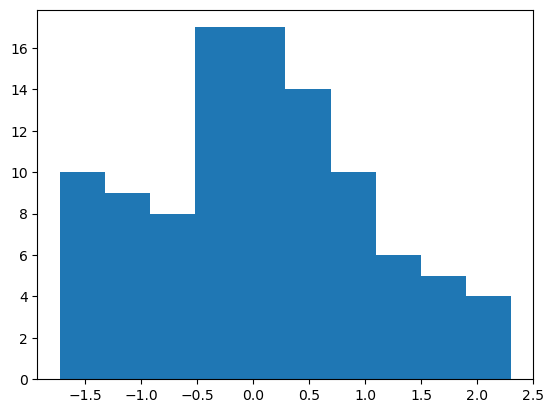

In [102]:
y = np.random.randn(100)

plt.hist(y, bins = 10)
plt.show()

In [101]:
y

array([ 0.93887628,  0.1730863 , -1.89690732, -0.54919122, -1.29269331,
        0.24263699, -0.3085707 ,  0.11213895, -0.67599055,  0.31129923,
       -1.12117446,  1.12332673, -1.20380907, -1.78622793, -0.61052931,
       -0.92288561,  1.29330985, -0.44193675,  1.24165947, -0.0929137 ,
        0.49965945, -0.00682786,  0.49966946,  0.11288726, -1.436071  ,
        0.19585561, -0.16406483,  1.39212183, -0.88814485,  1.14945882,
        1.2783769 , -0.74148877,  0.98692348, -0.37311239,  0.48552184,
        1.66139041, -0.98664327, -1.04455343, -0.39193619, -1.16052019,
        1.062353  ,  0.10668127, -0.68850569, -0.16443537,  0.03269347,
       -0.67749073,  0.68198706,  0.06077894,  0.45340819, -1.82895147,
       -1.13775516, -1.66062383, -0.27121408, -1.27159075, -1.18345324,
       -0.24503225,  0.51668369,  0.64045636,  0.14418715, -0.95320137,
        1.6201259 , -0.07431392, -0.16804402, -0.56480924,  0.49132268,
        0.61597017,  0.80209362, -0.78245791, -1.7371841 , -1.82

In [1]:
# 4th Sept, 2025

In [8]:
import pandas as pd
import numpy as np

In [9]:
# Read and Inspect Data
#👉 Given a CSV file employees.csv, how would you:

#Load it into Pandas?

#Show first 5 rows?

#Check column names and data types?

In [47]:
df = pd.read_csv("~chetandeshpande/downloads/employees.csv")

In [48]:
df.head()

,EmployeeID,Name,Department,Age,Salary,JoiningDate
0,101,Alice,HR,25,48000,2019-03-15
1,102,Bob,IT,32,60000,2018-07-10
2,103,Charlie,Finance,45,75000,2015-06-01
3,104,David,IT,28,52000,2020-01-25
4,105,Eva,HR,29,49000,2019-11-12


In [49]:
df.columns

Index(['EmployeeID', 'Name', 'Department', 'Age', 'Salary', 'JoiningDate'], dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   EmployeeID   8 non-null      int64 
 1   Name         8 non-null      object
 2   Department   8 non-null      object
 3   Age          8 non-null      int64 
 4   Salary       8 non-null      int64 
 5   JoiningDate  8 non-null      object
dtypes: int64(3), object(3)
memory usage: 512.0+ bytes


In [51]:
# Filtering with Conditions
# 👉 From a DataFrame df with columns Age and Salary, select only rows where:

# Age > 30 and Salary > 50,000.

In [52]:
x = ((df['Age'] > 30) & (df['Salary'] > 50000))
print(x.head())

0    False
1     True
2     True
3    False
4    False
dtype: bool


In [53]:
filtered_df = df.query("Age > 30 and Salary > 50000")
print(filtered_df)

   EmployeeID     Name Department  Age  Salary JoiningDate
1         102      Bob         IT   32   60000  2018-07-10
2         103  Charlie    Finance   45   75000  2015-06-01
5         106    Frank    Finance   40   68000  2016-09-23
6         107    Grace         IT   35   72000  2017-08-14
7         108    Helen         HR   50   80000  2010-05-30


In [54]:
# Find the total salary per Department.

# Find the average age per Department.

In [55]:
total_salary = df.groupby("Department")["Salary"].sum()
print(total_salary)

Department
Finance    143000
HR         177000
IT         184000
Name: Salary, dtype: int64


In [56]:
ave_age_per_dept = df.groupby("Department")["Age"].mean()
print(ave_age_per_dept)

Department
Finance    42.500000
HR         34.666667
IT         31.666667
Name: Age, dtype: float64


In [57]:
# Missing Values
# 👉 How would you:

# Find which columns have missing values?

In [58]:
df.isnull().sum()

EmployeeID     0
Name           0
Department     0
Age            0
Salary         0
JoiningDate    0
dtype: int64

In [71]:
# NumPy Arrays

# Array Basics
# 👉 Create a NumPy array with numbers from 10 to 50 in steps of 5.

# Then reshape it into a 3×3 matrix.

In [72]:
x = np.arange(10,51,5)
print(x)

[10 15 20 25 30 35 40 45 50]


In [73]:
np.reshape(x, (3, 3))

array([[10, 15, 20],
       [25, 30, 35],
       [40, 45, 50]])

In [74]:
# Array Operations
# 👉 Given a = np.array([1,2,3,4,5]), compute:

# Square of each element.

# Mean and standard deviation.

In [75]:
a = np.array([1,2,3,4,5])

In [81]:
b = a**2
b

array([ 1,  4,  9, 16, 25])

In [79]:
c = a.mean()
c

3.0

In [80]:
d = a.std()
d

1.4142135623730951

In [82]:
# Boolean Indexing
# 👉 From arr = np.array([5, 12, 7, 20, 25, 2]), select only numbers greater than 10.# 

In [83]:
arr = np.array([5, 12, 7, 20, 25, 2])

In [85]:
x = arr > 10
x

array([False,  True, False,  True,  True, False])

In [86]:
# Loop with Condition
# 👉 Write a for loop to calculate the sum of squares of numbers from 1 to 5.

In [88]:
x = range(1,6)
total = 0

for i in x:
    y = i**2
    total = total + y
    print(total)

1
5
14
30
55


In [89]:
# Nested Loops
# 👉 Print a multiplication table for numbers 1 through 3, using nested loops.

In [93]:
for i in range(1,4):
    for j in range(1,4):
        print(i*j, end="\t")
    print()

1	2	3	
2	4	6	
3	6	9	


In [94]:
# Custom Function
# 👉 Write a function is_even(n) that:

# Takes an integer input.

# Returns True if even, False if odd.

# Then use it in a loop to print all even numbers from 1 to 20.

In [105]:
def is_even(n):
    if n%2==0:
        return True
    else:
        return False
    
for i in range(1,21):
    if is_even(i):
        print(i, "is even")

2 is even
4 is even
6 is even
8 is even
10 is even
12 is even
14 is even
16 is even
18 is even
20 is even


In [104]:
is_even(3)

False